# 수익성 분석

## 데이터 불러오기 및 전처리

### 데이터
- 역별 데이터
- 일평균승하차 : 역별 일평균승하차
- 업장수 : 10인 이하 업체
- 1인 가구수, 2인 가구수
- 환승 : 환승역 1
- 면적(m**2)
- 레벨 데이터 : 1부터 10까지 레벨
- 일평균(원) : 역별 일평균 운수 수익

In [2]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import numpy as np
import pandas as pd
import seaborn as sns

In [35]:
from pylab import rcParams

rcParams['figure.figsize'] = 15,10

In [16]:
plt.rc('font', family='Malgun Gothic')
sns.set(font='Malgun Gothic', rc={'axes.unicode_minus':False}, style='darkgrid')

In [17]:
df = pd.read_csv('./상관관계분석데이터.csv', encoding='euc-kr')
df.head(5)

,역사명,일평균승하차,업장수,1인 가구수,2인 가구수,환승,총 상가 수,공실 상가 수,전체 상가 면적,공실 상가 면적,20~40대 인구 수,일평균승하차 레벨,업장수 레벨,1인 가구수 레벨,2인 가구수 레벨,20~40대 인구 수 레벨,Unnamed: 16,일평균(원)
0,가야,5799,202,5268,2440,NaN,1.0,0.0,11.0,0.0,5239,26,41,83,66,57,NaN,1926082
1,감전,6107,427,3665,1927,NaN,1.0,0.0,10.0,0.0,3093,29,82,56,50,31,NaN,2535118
2,강서구청,4251,251,2125,893,NaN,NaN,NaN,NaN,NaN,1143,15,57,26,12,4,NaN,2029127
3,개금,13621,240,4923,1843,NaN,3.0,0.0,37.0,0.0,5892,69,55,79,47,65,NaN,4717075
4,거제,9546,119,1881,1349,NaN,1.0,0.0,16.0,0.0,2219,51,15,14,25,13,NaN,3099526


In [18]:
df.rename(columns={"일평균(원)":"일평균운행수익(원)"},inplace=True)

In [19]:
df.isnull().sum()

역사명                0
일평균승하차             0
업장수                0
1인 가구수             0
2인 가구수             0
환승                93
총 상가 수             9
공실 상가 수            9
전체 상가 면적           9
공실 상가 면적           9
20~40대 인구 수        0
일평균승하차 레벨          0
업장수 레벨             0
1인 가구수 레벨          0
2인 가구수 레벨          0
20~40대 인구 수 레벨     0
Unnamed: 16       99
일평균운행수익(원)         0
dtype: int64

In [20]:
df = df.fillna(0)
df.isnull().sum()

역사명               0
일평균승하차            0
업장수               0
1인 가구수            0
2인 가구수            0
환승                0
총 상가 수            0
공실 상가 수           0
전체 상가 면적          0
공실 상가 면적          0
20~40대 인구 수       0
일평균승하차 레벨         0
업장수 레벨            0
1인 가구수 레벨         0
2인 가구수 레벨         0
20~40대 인구 수 레벨    0
Unnamed: 16       0
일평균운행수익(원)        0
dtype: int64

In [21]:
df_dr = df.drop(['환승','일평균승하차 레벨','업장수 레벨','1인 가구수 레벨','2인 가구수 레벨','20~40대 인구 수 레벨','Unnamed: 16'], axis=1)
df_dr.head(70)

,역사명,일평균승하차,업장수,1인 가구수,2인 가구수,총 상가 수,공실 상가 수,전체 상가 면적,공실 상가 면적,20~40대 인구 수,일평균운행수익(원)
0,가야,5799,202,5268,2440,1.0,0.0,11.0,0.0,5239,1926082
1,감전,6107,427,3665,1927,1.0,0.0,10.0,0.0,3093,2535118
2,강서구청,4251,251,2125,893,0.0,0.0,0.0,0.0,1143,2029127
3,개금,13621,240,4923,1843,3.0,0.0,37.0,0.0,5892,4717075
4,거제,9546,119,1881,1349,1.0,0.0,16.0,0.0,2219,3099526
...,...,...,...,...,...,...,...,...,...,...,...
65,서대신,5277,164,2552,1632,1.0,0.0,8.0,0.0,3764,1748640
66,서동,4052,102,2478,1309,1.0,0.0,12.0,0.0,1976,976723
67,서면,57826,136818,4142,1138,3.0,1.0,130.0,26.0,4625,39388852
68,석대,346,159,4295,2022,1.0,1.0,10.0,10.0,2584,86682


### 산점도

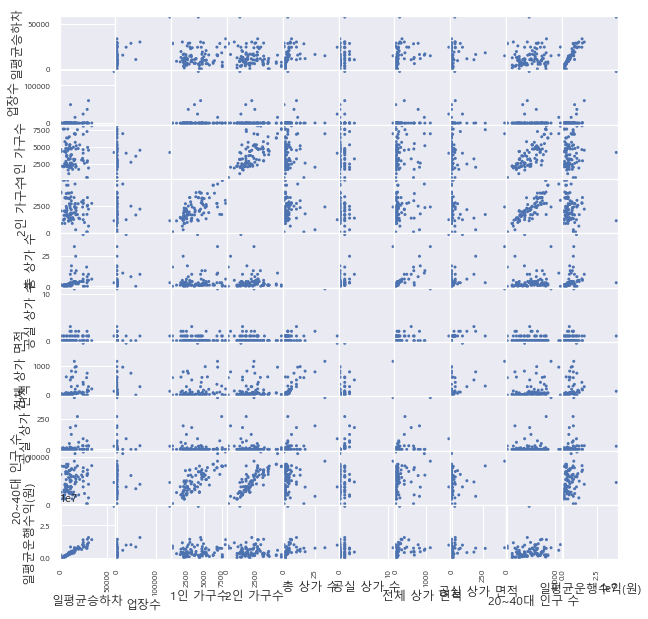

In [40]:
from pandas.plotting import scatter_matrix
scatter_matrix(df_dr,
               alpha=1, ## 데이터 포인트의 투명도 1 = 가장진함, 0 = 완전투명
               figsize=(10,10), ## 캔버스 사이즈 조절
               diagonal=None) ## 대각 원소에는 아무것도 그리지 않는다.
plt.show()

### 각 변수별 산점도

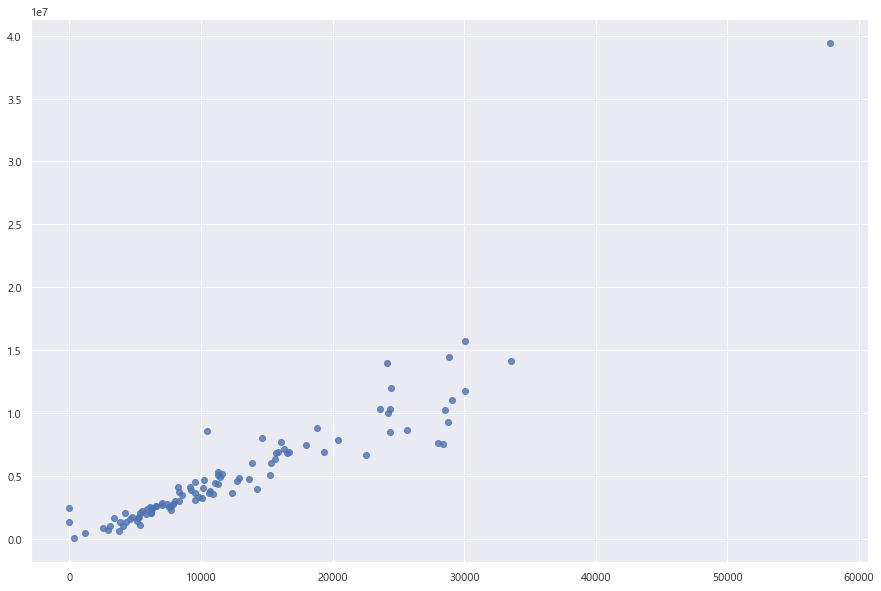

In [37]:
# 일평균 승하차와 일평균 수익 산점도
plt.scatter(df[['일평균승하차']], df[['일평균운행수익(원)']], alpha=0.8)
plt.show()

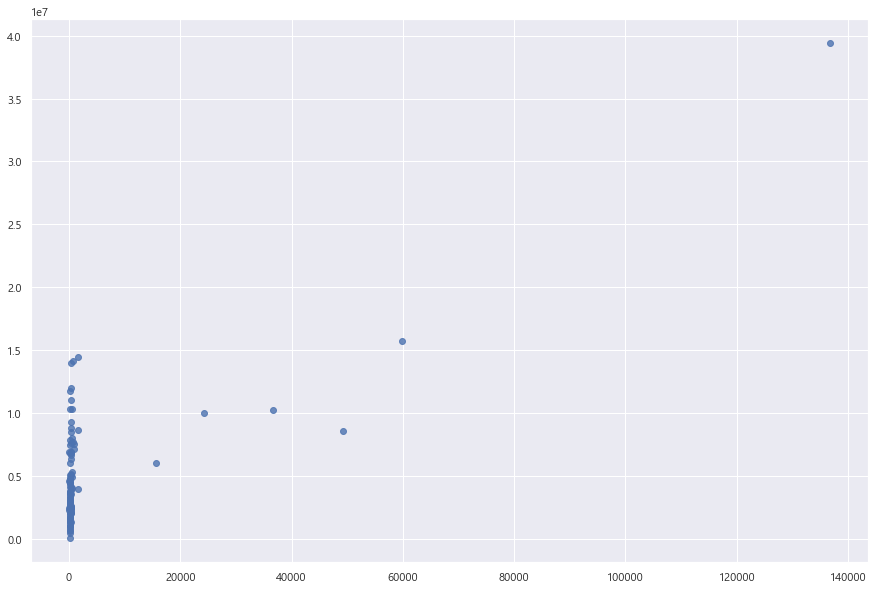

In [ ]:
# 업장수와 일평균 수익 산점도
plt.scatter(df[['업장수']], df[['일평균운행수익(원)']], alpha=0.8)
plt.show()

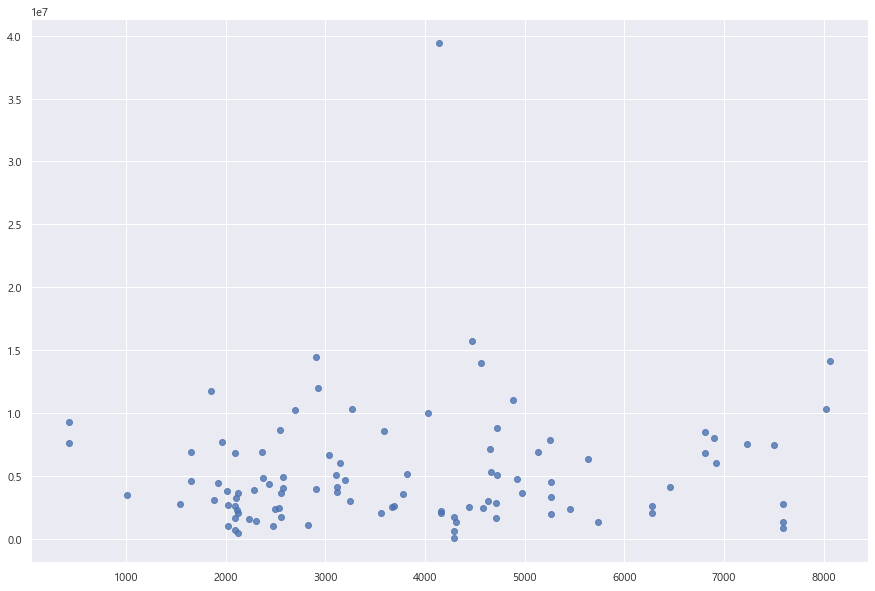

In [ ]:
# 1인 가구수와 일평균 수익 산점도
plt.scatter(df[['1인 가구수']], df[['일평균운행수익(원)']], alpha=0.8)
plt.show()

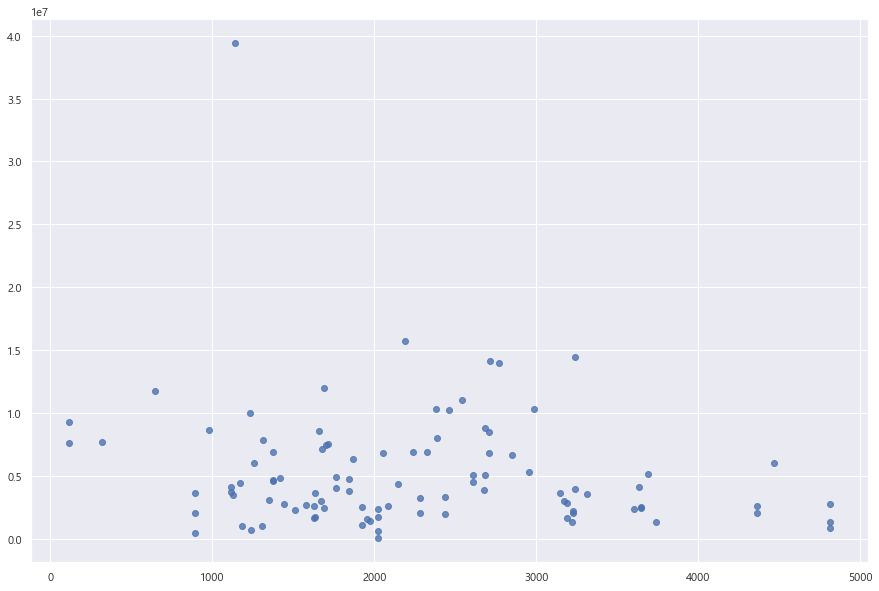

In [ ]:
# 2인 가구수와 일평균 수익 산점도
plt.scatter(df[['2인 가구수']], df[['일평균운행수익(원)']], alpha=0.8)
plt.show()

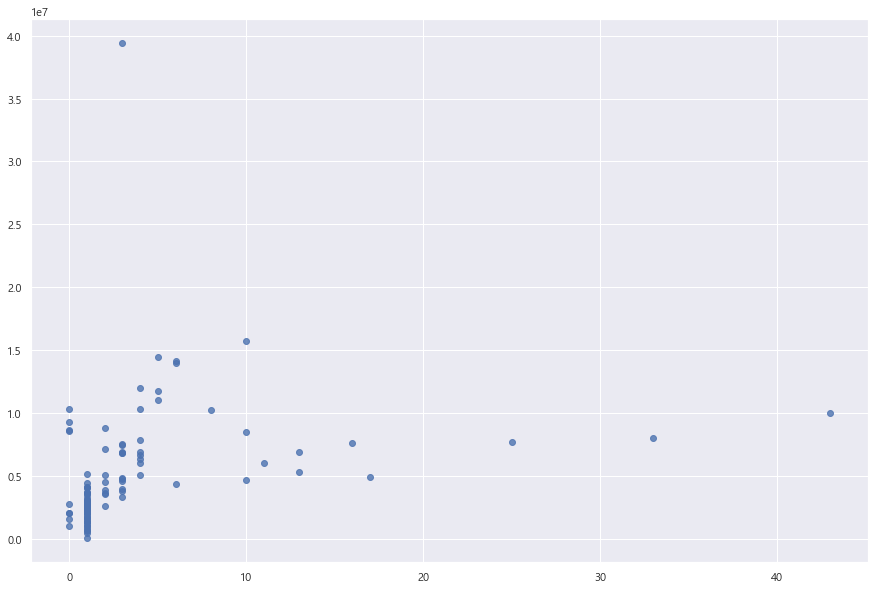

In [ ]:
# 총 상가 수와 일평균 수익 산점도
plt.scatter(df[['총 상가 수']], df[['일평균운행수익(원)']], alpha=0.8)
plt.show()

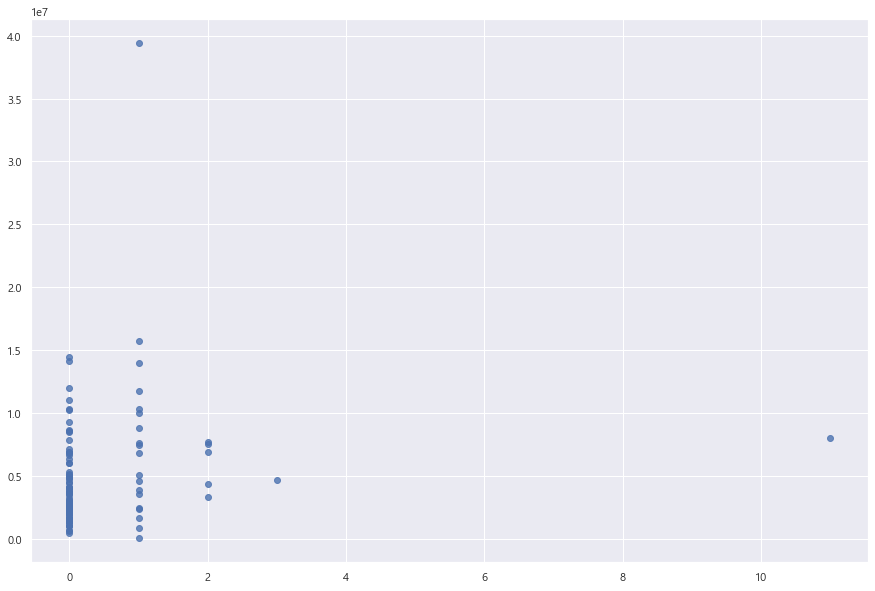

In [ ]:
# 공실 상가 수와 일평균 수익 산점도
plt.scatter(df[['공실 상가 수']], df[['일평균운행수익(원)']], alpha=0.8)
plt.show()

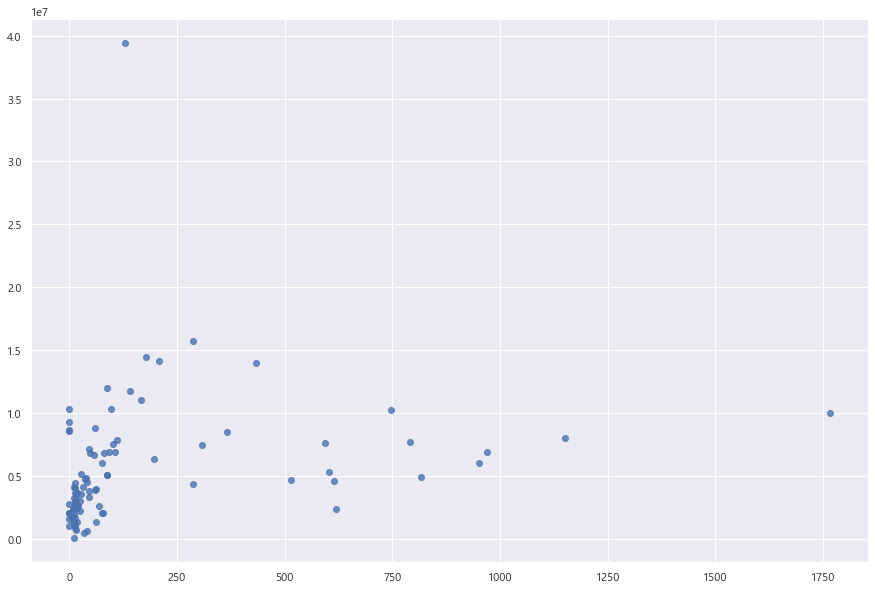

In [ ]:
# 전체 상가 면적와 일평균 수익 산점도
plt.scatter(df[['전체 상가 면적']], df[['일평균운행수익(원)']], alpha=0.8)
plt.show()

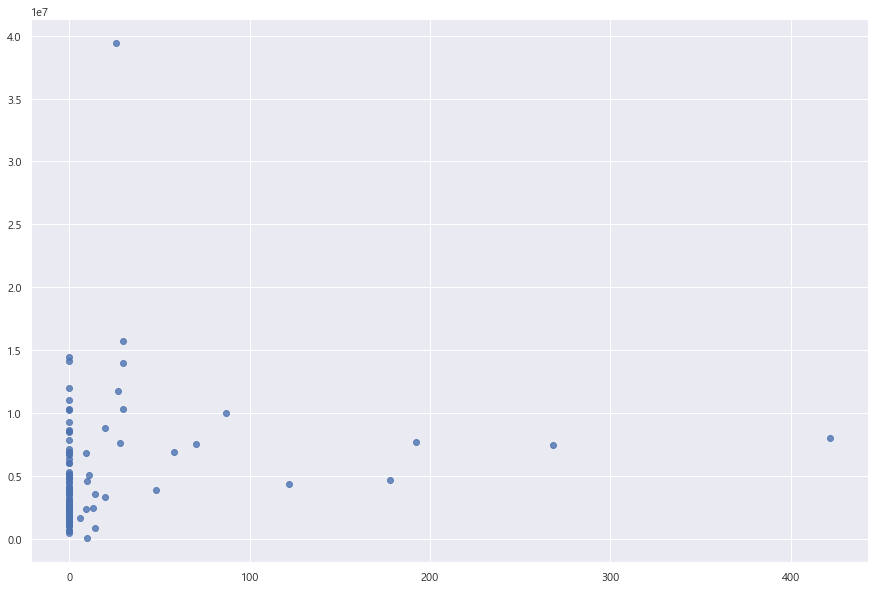

In [ ]:
# 공실 상가 면적와 일평균 수익 산점도
plt.scatter(df[['공실 상가 면적']], df[['일평균운행수익(원)']], alpha=0.8)
plt.show()

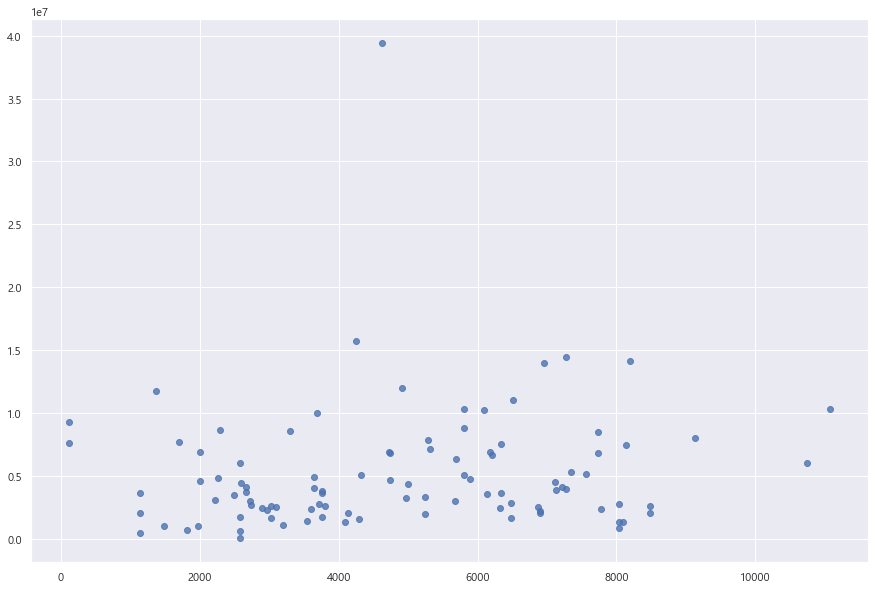

In [ ]:
# 20~40대 인구 수와 일평균 수익 산점도
plt.scatter(df[['20~40대 인구 수']], df[['일평균운행수익(원)']], alpha=0.8)
plt.show()

일평균 승하차를 제외한 변수는 선형성이 보이지 않음

## 상관계수 확인

In [10]:
df_dr_corr = df_dr.corr()
df_dr_corr

,일평균승하차,업장수,1인 가구수,2인 가구수,총 상가 수,공실 상가 수,전체 상가 면적,공실 상가 면적,20~40대 인구 수,일평균운행수익(원)
일평균승하차,1.000000,0.546338,0.073517,-0.219489,0.324463,0.136527,0.300698,0.142856,0.101749,0.923841
업장수,0.546338,1.000000,0.031838,-0.094213,0.130454,0.042534,0.151750,0.020812,-0.003959,0.745880
1인 가구수,0.073517,0.031838,1.000000,0.678060,0.075568,0.136978,0.123196,0.161959,0.795652,0.100708
2인 가구수,-0.219489,-0.094213,0.678060,1.000000,-0.140730,-0.074858,-0.046498,-0.137080,0.833922,-0.165102
총 상가 수,0.324463,0.130454,0.075568,-0.140730,1.000000,0.542959,0.903864,0.584399,0.075275,0.279989
공실 상가 수,0.136527,0.042534,0.136978,-0.074858,0.542959,1.000000,0.420372,0.859608,0.122423,0.156888
전체 상가 면적,0.300698,0.151750,0.123196,-0.046498,0.903864,0.420372,1.000000,0.484835,0.160154,0.259099
공실 상가 면적,0.142856,0.020812,0.161959,-0.137080,0.584399,0.859608,0.484835,1.000000,0.140966,0.156004
20~40대 인구 수,0.101749,-0.003959,0.795652,0.833922,0.075275,0.122423,0.160154,0.140966,1.000000,0.127530
일평균운행수익(원),0.923841,0.745880,0.100708,-0.165102,0.279989,0.156888,0.259099,0.156004,0.127530,1.000000


### 히트맵 확인

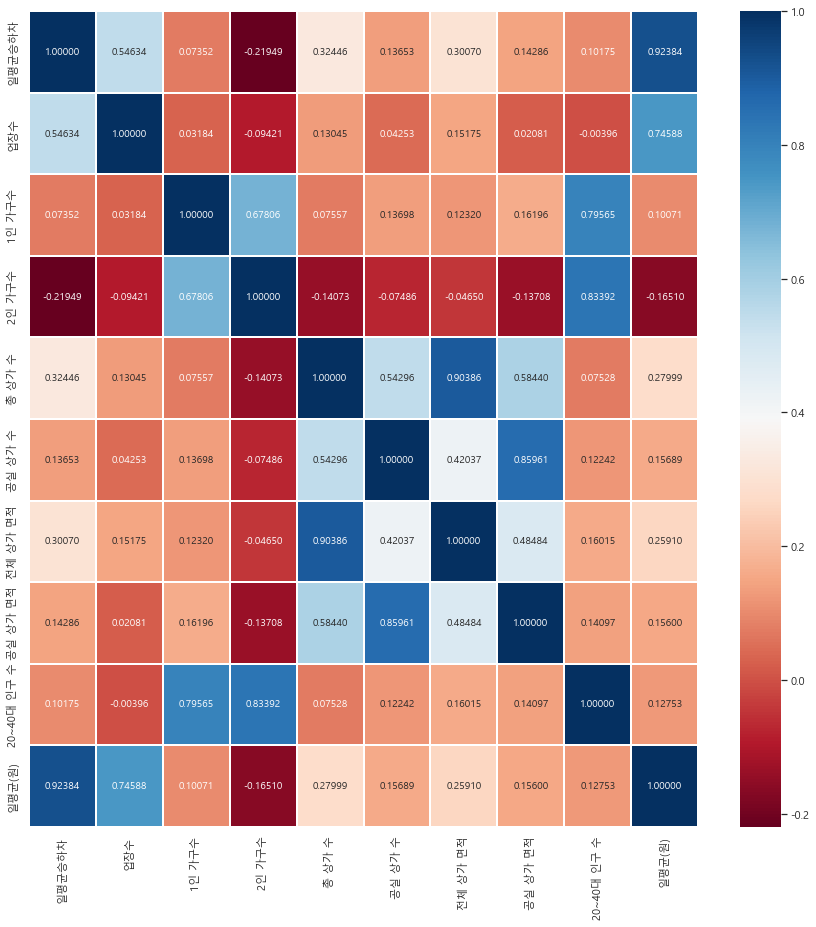

In [9]:
plt.figure(figsize=(15,15))
color_map = plt.cm.RdBu

sns.heatmap(df_dr_corr, annot=True, fmt='.5f', linewidths=0.1, cmap=color_map)
plt.show()

## 다중회귀분석

In [10]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [33]:
x = df_dr[["일평균승하차","업장수","1인 가구수","2인 가구수","총 상가 수","공실 상가 수","전체 상가 면적","공실 상가 면적","20~40대 인구 수"]]

In [12]:
y = df_dr[["일평균운행수익(원)"]]
y

,일평균(원)
0,1926082
1,2535118
2,2029127
3,4717075
4,3099526
...,...
94,1117126
95,6002230
96,11010043
97,8828608


In [13]:
# 테스트 훈련 데이터 분할
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, test_size=0.3, random_state=42)

In [14]:
# Train the MLR / 회귀모델적합
# OLS(Ordinary Least Squares)
fullModel = sm.OLS(y_train,x_train)
fittedFullModel = fullModel.fit()

- R-squared : 0.979
- Adj. R-squared : 0.975
- Prob (F-statistic) : 1.12e-46
- P>[t] : 일평균승하차, 업장수, 20~40대 인구 수 외에는 유의미하지 않음

In [15]:
print(fittedFullModel.summary())

                                 OLS Regression Results                                
Dep. Variable:                 일평균(원)   R-squared (uncentered):                   0.979
Model:                            OLS   Adj. R-squared (uncentered):              0.975
Method:                 Least Squares   F-statistic:                              305.9
Date:                Wed, 16 Nov 2022   Prob (F-statistic):                    1.12e-46
Time:                        09:56:28   Log-Likelihood:                         -1058.9
No. Observations:                  69   AIC:                                      2136.
Df Residuals:                      60   BIC:                                      2156.
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

In [16]:
x = df_dr[["일평균승하차","업장수","20~40대 인구 수"]]

In [17]:
# 다시 테스트 훈련 데이터 분할
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, test_size=0.3, random_state=42)

In [18]:
# 다시 회귀분석 실행
fullModel = sm.OLS(y_train,x_train)
fittedFullModel = fullModel.fit()

- Adj. R-squared : 0.974
- Prob (F-statistic) : 1.05e-52
- p-value : 일평균승하차, 업장수 : 0.000 (O)  /  20~40대 인구 수 : 0.390 (X)

In [19]:
print(fittedFullModel.summary())

                                 OLS Regression Results                                
Dep. Variable:                 일평균(원)   R-squared (uncentered):                   0.975
Model:                            OLS   Adj. R-squared (uncentered):              0.974
Method:                 Least Squares   F-statistic:                              853.3
Date:                Wed, 16 Nov 2022   Prob (F-statistic):                    1.05e-52
Time:                        09:56:29   Log-Likelihood:                         -1064.6
No. Observations:                  69   AIC:                                      2135.
Df Residuals:                      66   BIC:                                      2142.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
mlr = LinearRegression()
multi_model = mlr.fit(x_train, y_train) 

In [ ]:
# 훈련 정확도
multi_model.score(x_train, y_train)

0.9527677599960804

In [ ]:
multi_model.score(x_test, y_test)

0.8422936316025966

### 예측

In [22]:
my_predict = mlr.predict(x_test)
my_predict

array([[13510831.88724767],
       [ 3846403.24530334],
       [ 5024530.88801793],
       [ 2754575.58536856],
       [ 7391389.63021528],
       [ 7337785.66655835],
       [ 2380674.29449843],
       [ 6413439.52100281],
       [ 2131238.89748227],
       [ 2212406.73452986],
       [ 2234971.36429923],
       [ 7947183.20454843],
       [ 2871949.88797517],
       [ 4356973.4027706 ],
       [ 1000094.97004841],
       [ 3288371.79538612],
       [ 3911232.0605322 ],
       [ 2834766.60510549],
       [ 3924392.50513531],
       [ 9252966.49719391],
       [ 8369697.16335739],
       [  322419.77613433],
       [ -261986.30185019],
       [  664701.93539968],
       [ 4805022.36742917],
       [15292359.68393732],
       [ 2849854.76431096],
       [10273548.10447977],
       [ 6093941.69734518],
       [ 1817593.23870173]])

### 시각화

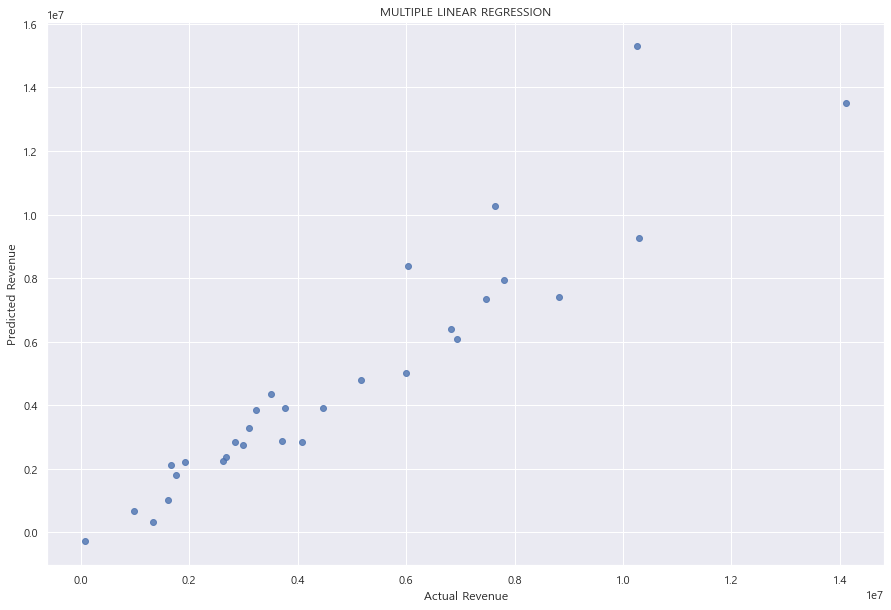

In [24]:
plt.scatter(y_test, my_predict, alpha=0.8)
plt.xlabel("Actual Revenue")
plt.ylabel("Predicted Revenue")
plt.title("MULTIPLE LINEAR REGRESSION")
plt.show()

### 상관계수 확인

In [13]:
print(mlr.coef_)

NameError: name 'mlr' is not defined

### 모델의 정확도 평가